In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [108]:
credit_df = pd.read_csv(r"C:\Users\AA\DataScience\datasets\creditcard.csv")
credit_df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [109]:
credit_df.head(20)

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   

         V25       V26       V27       V28  Amount  Class  
0   0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1   0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3   0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  -0.206010  0.502292  0.219422  0.215153   69.99      0  
5  -0.232794  0.105915  0.253844  0.081080    3.67      0  
6   0.750137 -0.257237  0.034507  0.005168    4.99      0  
7  -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8   0.373205 -0.384157  0.011747  0.142404   93.20      0  
9  -0.069733  0.094199  0.246219  0.083076    3.68      0  
10  0.251367 -0.129478  0.042850  0.016253    7.80      0  
11 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
12  0.161

In [110]:
credit_df.shape

(284807, 31)

In [111]:
credit_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [112]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Distribution Analysis

In [113]:
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

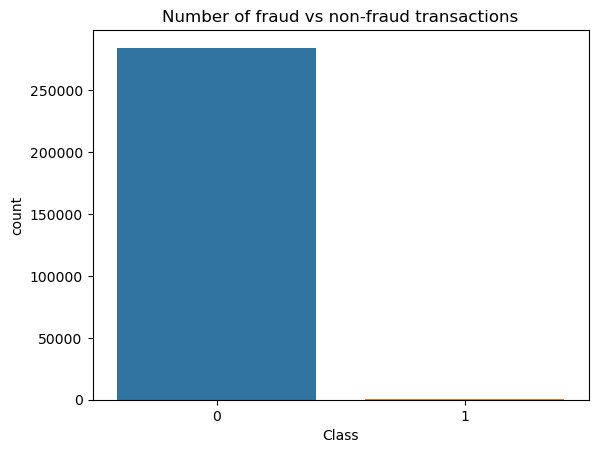

In [114]:
sns.countplot(x='Class', data=credit_df)
plt.title('Number of fraud vs non-fraud transactions')
plt.show()

Outliers treatment 


We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

In [115]:
data_fraud = credit_df[credit_df['Class'] == 1]
data_fraud.head(20)

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
6331  7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6334  7535.0  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
6336  7543.0  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
6338  7551.0  0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353   
6427  7610.0  0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193   
6446  7672.0  0.702710  2.426433 -5.234513  4.416661 -2.170806 -2.667554   
6472  7740.0  1.023874  2.001485 -4.769752  3.819195 -1.271754 -1.734662   
6529  7891.0 -1.585505  3.261585 -4.137422  2.357096 -1.405043 -1.879437   
6609  8090.0 -1.783229  3.402794 -3.822742  2.625368 -1.976415 -2.731689   
6641  8169.0  0.857321  4.093912 -7.423894  7.380245  0.973366 -2.730762   
6717  8408.0 -1.813280  4.917851 -5.926130  5.701500  1.204393 -3.035138   
6719  8415.0 -0.251471  4.313523 -6.891438  6.796797  0.616297 -2.966327   
6734  8451.0  0.314597  2.660670 -5.920037  4.522500 -2.315027 -2.278352   
6774  8528.0  0.447396  2.481954 -5.660814  4.455923 -2.443780 -2.185040   
6820  8614.0 -2.169929  3.639654 -4.508498  2.730668 -2.122693 -2.341017   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   
6331 -1.631735  0.154612 -2.795892  ...  0.364514 -0.608057 -0.539528   
6334 -1.689102  0.303253 -3.139409  ...  0.370509 -0.576752 -0.669605   
6336 -0.812891  0.133080 -2.214311  ...  0.156617 -0.652450 -0.551572   
6338 -0.746579  0.055586 -2.678679  ...  0.208828 -0.511747 -0.583813   
6427 -3.968593  1.063728 -0.486097  ...  0.589669  0.109541  0.601045   
6446 -3.878088  0.911337 -0.166199  ...  0.551180 -0.009802  0.721698   
6472 -3.059245  0.889805  0.415382  ...  0.343283 -0.054196  0.709654   
6529 -3.513687  1.515607 -1.207166  ...  0.501543 -0.546869 -0.076584   
6609 -3.430559  1.413204 -0.776941  ...  0.454032 -0.577526  0.045967   
6641 -1.496497  0.543015 -2.351190  ...  0.375026  0.145400  0.240603   
6717 -1.713402  0.561257 -3.796354  ...  0.615642 -0.406427 -0.737018   
6719 -2.436653  0.489328 -3.371639  ...  0.536892 -0.546126 -0.605240   
6734 -4.684054  1.202270 -0.694696  ...  0.743314  0.064038  0.677842   
6774 -4.716143  1.249803 -0.718326  ...  0.756053  0.140168  0.665411   
6820 -4.235253  1.703538 -1.305279  ...  0.645103 -0.503529 -0.000523   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  
6331  0.128940  1.488481  0.507963  0.735822  0.513574    1.00      1  
6334 -0.759908  1.605056  0.540675  0.737040  0.496699    1.00      1  
6336 -0.716522  1.415717  0.555265  0.530507  0.404474    1.00      1  
6338 -0.219845  1.474753  0.491192  0.518868  0.402528    1.00      1  
6427 -0.364700 -1.843078  0.351909  0.594550  0.099372    1.00      1  
6446  0.473246 -1.959304  0.319476  0.600485  0.129305    1.00      1  
6472 -0.37221

In [116]:
data_non_fraud = credit_df[credit_df['Class']==0]
data_non_fraud.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

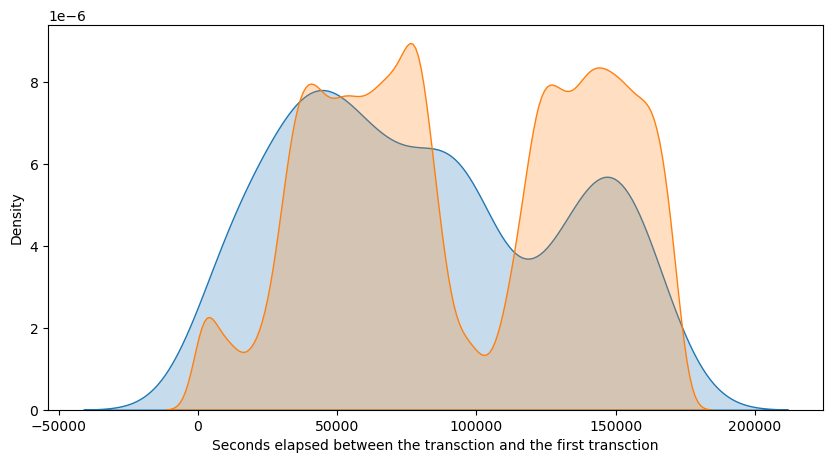

In [117]:
#Distribution plot
plt.figure(figsize=(10,5))
fig = sns.kdeplot(data_fraud['Time'],label='fraud',fill=True)
fig = sns.kdeplot(data_non_fraud['Time'],label='non fraud',fill=True)
fig.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.show()

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [118]:
credit_df.drop('Time',axis=1,inplace=True)

In [119]:
credit_df.head(10)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   
5  0.260314 -0.568671 -0.371407  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  0.081213  0.464960 -0.099254  ... -0.167716 -0.270710 -0.154104 -0.780055   
7 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
8  0.851084 -0.392048 -0.410430  ... -0.073425 -0.268092 -0.204233  1.011592   
9  0.069539 -0.736727 -0.366846  ... -0.246914 -0.633753 -0.120794 -0.385050   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  
5 -0.232794  0.105915  0.253844  0.081080    3.67      0  
6  0.750137 -0.257237  0.034507  0.005168    4.99      0  
7 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8  0.373205 -0.384157  0.011747  0.142404   93.20      0  
9 -0.069733  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 30 columns]

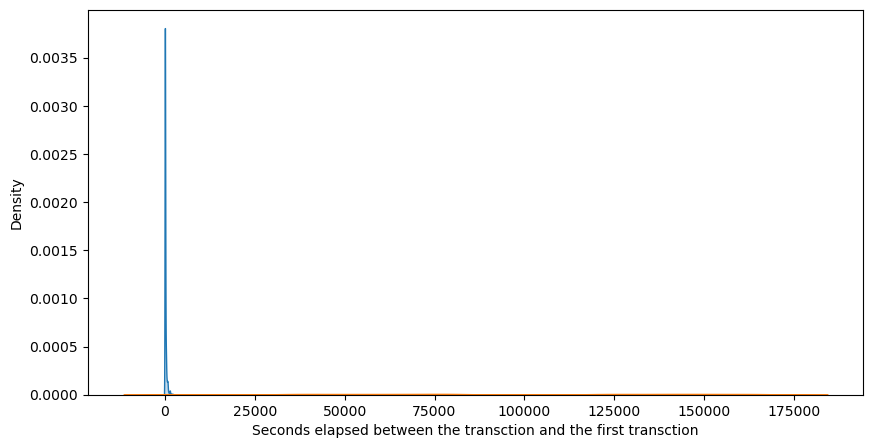

In [120]:
plt.figure(figsize=(10,5))
fig = sns.kdeplot(data_fraud['Amount'],label='fraud',fill=True)
fig = sns.kdeplot(data_non_fraud['Time'],label='non fraud',fill=True)
fig.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.show()

We can see that the fraud transctions are mostly densed in the lower range of amount, whereas the non-fraud transctions are spreaded throughout low to high range of amount.

# Train-TestSplit

In [121]:
x_feature = credit_df.drop(['Class'],axis=1)
y_target=credit_df['Class']

In [122]:
x_feature.shape

(284807, 29)

In [123]:
x_feature_train, x_feature_test,y_target_train,y_target_test = train_test_split(x_feature,y_target,
                                                                    train_size=0.8,test_size=0.2,random_state=100)

# Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
#Instantiate the scaler
scaler = StandardScaler()

In [126]:
x_feature_train['Amount'] = scaler.fit_transform(x_feature_train[['Amount']])
x_feature_train.head(10)

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   
3033    1.103967  0.553766  0.778871  2.304497  0.068141  0.271938 -0.033340   
228176  2.134062 -2.016921  0.490233 -1.374819 -2.236844  0.684066 -2.365774   
193292  1.812605 -0.609245 -1.761159  0.332286  0.051915 -0.866634  0.348171   
40555  -1.168426 -4.213607 -0.177489  1.145500 -1.942006  1.316786  0.599912   
240680 -1.187571  1.609425  0.117474  0.784571  0.330675 -0.539494  0.893377   

              V8        V9       V10  ...       V20       V21       V22  \
201788  0.192230  1.124319 -0.037763  ... -0.171390 -0.195207 -0.477813   
179369 -0.049137 -0.732566  0.297692  ...  0.206709 -0.124288 -0.263560   
73138   0.919341 -0.612193 -0.966197  ...  0.842838  0.274911 -0.319550   
208679 -0.539483 -0.813368  0.785431  ... -0.196551 -0.406722 -0.899081   
206534 -0.449263 -0.717258  0.851668  ... -0.045417  0.050447  0.125601   
3033    0.164419 -1.059271  0.785143  ... -0.151972 -0.166874 -0.536868   
228176  0.342946 -0.118374  1.460068  ... -0.352279  0.022809  0.800617   
193292 -0.336228  0.792826 -0.037948  ...  0.054303  0.297838  0.629357   
40555   0.215211  0.812903 -0.834007  ...  2.194125  0.572188 -0.726796   
240680 -0.650813  0.395045  1.989673  ...  0.629778 -0.314247 -0.165155   

             V23       V24       V25       V26       V27       V28    Amount  
201788  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947 -0.345273  
179369 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053 -0.206439  
73138   0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257  0.358043  
208679  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488  0.362400  
206534  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872 -0.316109  
3033    0.159609 -0.017675  0.160084 -0.254910  0.008900  0.015610 -0.344763  
228176  0.140597 -0.464337 -0.390731 -0.018163  0.098173 -0.037727 -0.219157  
193292 -0.224630 -0.691724  0.267564 -0.071594 -0.052831 -0.038947  0.287429  
40555  -0.888319 -0.172141 -0.482714  0.830617 -0.224991  0.199166  4.241829  
240680  0.233283 -0.022255 -0.855796  0.505257 -0.041460  0.290942 -0.334204  

[10 rows x 29 columns]

Scaling test set

In [127]:
x_feature_test['Amount']=scaler.transform(x_feature_test[['Amount']])
x_feature_test.head(10)

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   
6079   -0.635633  1.521837  0.656768  0.838245  0.532915  0.157448  0.292106   
270936 -1.764248 -1.699441  0.582677 -0.939746 -0.275635 -0.134024 -0.338088   
40673   1.173212 -0.301503 -0.037885  0.356057  0.042944  0.691171 -0.320703   
143209 -2.668967  2.944584 -0.587280  1.051267 -1.075444  4.034068 -5.536074   
238543 -0.755085 -0.235861  0.774932  1.042249 -1.680953  1.387539  1.668252   

               V8        V9       V10  ...       V20       V21       V22  \
49089    1.036103  0.745991 -0.147304  ... -0.057922 -0.170060 -0.288750   
154704   0.752811  1.962566 -1.025024  ... -0.147619 -0.184153 -0.089661   
67247    0.303698  1.042073 -0.437209  ...  0.437685  0.028010 -0.384708   
251657  -0.216140  0.680314  0.079977  ... -0.227278 -0.357993 -0.905085   
201903  -0.254233 -1.959060  0.948915  ...  0.249457 -0.035049  0.271455   
6079     0.380324  0.532503 -0.674872  ...  0.019180 -0.019119  0.305075   
270936   0.578215 -1.452061 -0.184394  ...  1.022449  0.223734 -0.361278   
40673    0.315731  0.570721 -0.041186  ... -0.154324 -0.236422 -0.652011   
143209 -13.130191 -1.098259 -2.056649  ...  1.566584 -2.128851  0.301377   
238543   0.023168  0.605697 -0.583688  ... -0.146770  0.434367  1.666833   

             V23       V24       V25       V26       V27       V28    Amount  
49089  -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104 -0.340485  
154704  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831 -0.320859  
67247  -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485  0.853442  
251657  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238 -0.344410  
201903  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955 -0.229480  
6079   -0.183507 -0.795949 -0.133169 -0.274159  0.286487  0.142654 -0.328670  
270936  0.636939  0.745322 -0.511885 -0.535741 -0.012948 -0.097358  0.585195  
40673  -0.114202 -1.159818  0.410422  0.462619 -0.036898 -0.012928 -0.203299  
143209  0.975001 -0.772814  0.224982 -0.394075  0.245981  0.238586  0.122257  
238543  0.103164  0.060404 -0.456047 -0.370333  0.318192  0.158296  1.300287  

[10 rows x 29 columns]

In [128]:
#Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [129]:
results = pd.DataFrame(columns=['model name', 'accuracy', 'f1-score', 'ROC'])

In [130]:
# ROC Curve function
def roc_fig(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    accuracy_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='roc curve (area =%0.2f)'% accuracy_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate or [1- true negative rate]')
    plt.ylabel('True positive rate ')
    plt.title('Receiver operating characteristics example')
    plt.legend(loc="lower right")
    plt.show()
    return None

# 1. Using Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
log_reg = LogisticRegression(C=0.01)

In [133]:
logistic_model = log_reg.fit(x_feature_train,y_target_train)

In [134]:
def result(model_name, model):
    y_target_test_pred = model.predict(x_feature_test)
    con_matrix = metrics.confusion_matrix(y_target_test,y_target_test_pred)
    print(con_matrix)
    
    con_matrix_display = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
    con_matrix_display.plot()
    plt.show()
    
    print(classification_report(y_target_test,y_target_test_pred))
    
    tp = con_matrix[1,1]
    tn = con_matrix[0,0]
    fp = con_matrix[0,1]
    fn = con_matrix[1,0]
    
    #accuracy
    print("Accuracy: ", metrics.accuracy_score(y_target_test,y_target_test_pred))
    
    #specificity
    print("Specificity: ", tn/float(tn+fp))
    
    #sensitivity
    print("sensitivity: ", tp/float(tp+fn))
    
    #F1 score
    print("f1-score: ", f1_score(y_target_test,y_target_test_pred))
    
    #predicted probability
    y_target_test_pred_probab = model.predict_proba(x_feature_test)[:,1]
    
    #roc_accuracy
    roc_accuracy = metrics.roc_auc_score(y_target_test,y_target_test_pred_probab)
    roc_fig(y_target_test,y_target_test_pred_probab)
    
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_target_test,y_target_test_pred), f1_score(y_target_test, y_target_test_pred), roc_accuracy]
    
    return None

[[56852    14]
 [   44    52]]


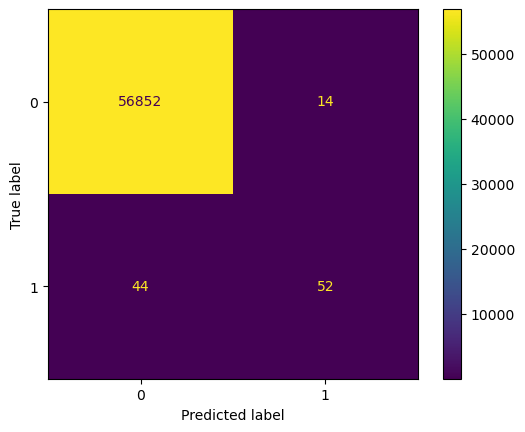

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.54      0.64        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy:  0.9989817773252344
Specificity:  0.9997538071958639
sensitivity:  0.5416666666666666
f1-score:  0.6419753086419753


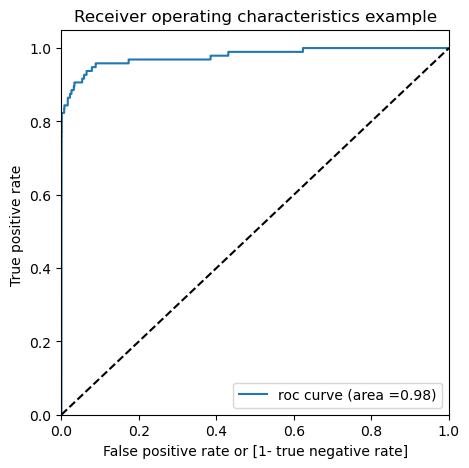

In [135]:
result("Logistic Regression", logistic_model)

# 2. Using Decision Tree 

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
decision_tree_model = DecisionTreeClassifier(criterion="gini",
                                            random_state=100,max_depth=5,
                                            min_samples_leaf=100,min_samples_split=100)
decision_tree_model.fit(x_feature_train, y_target_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

[[56836    30]
 [   40    56]]


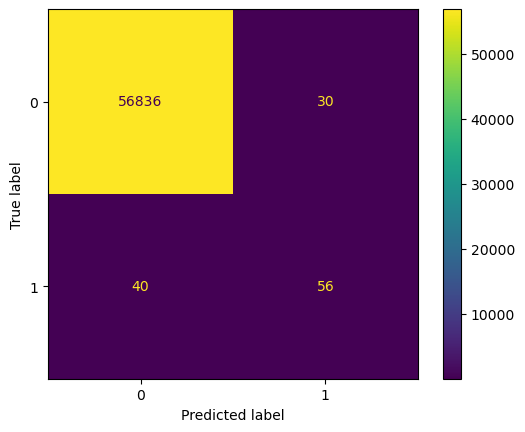

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy:  0.9987711105649381
Specificity:  0.9994724439911371
sensitivity:  0.5833333333333334
f1-score:  0.6153846153846155


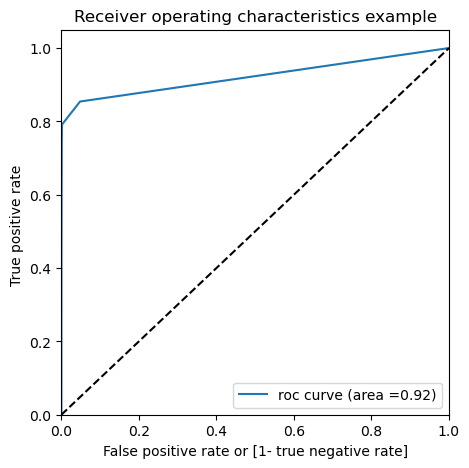

In [138]:
result("Decision Tree: ",decision_tree_model)

# 3. Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
random_forest_model = RandomForestClassifier(bootstrap=True,max_depth=5,min_samples_leaf=50,min_samples_split=50,max_features=10,n_estimators=100)

In [141]:
random_forest_model.fit(x_feature_train,y_target_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

[[56840    26]
 [   36    60]]


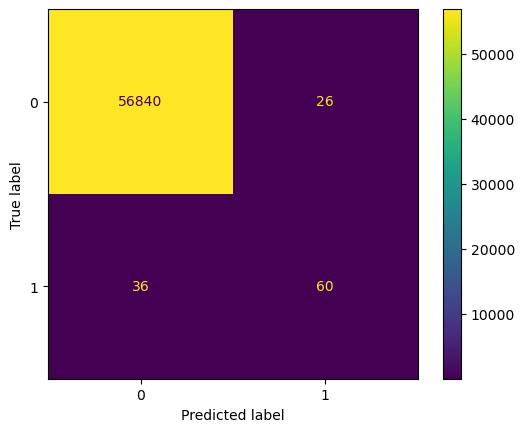

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.62      0.66        96

    accuracy                           1.00     56962
   macro avg       0.85      0.81      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy:  0.9989115550718023
Specificity:  0.9995427847923188
sensitivity:  0.625
f1-score:  0.6593406593406593


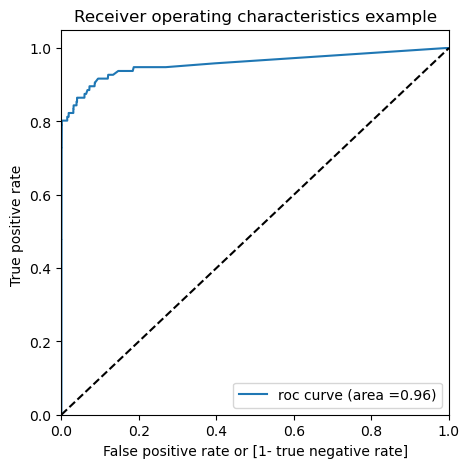

In [142]:
result("Random Forest: ", random_forest_model)

# 4. Using XGBoost

In [143]:
from xgboost import XGBClassifier

In [144]:
!pip install xgboost

In [145]:
params = {'learning_rate':0.2, 'max_depth':2,
          'n_estimators':200, 'subsample':0.9,
          'objective':'binary:logistic'}

In [146]:
xgb_model = XGBClassifier(params = params)
xgb_model.fit(x_feature_train,y_target_train)

C:\Users\AA\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:23:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

[[56858     8]
 [   25    71]]


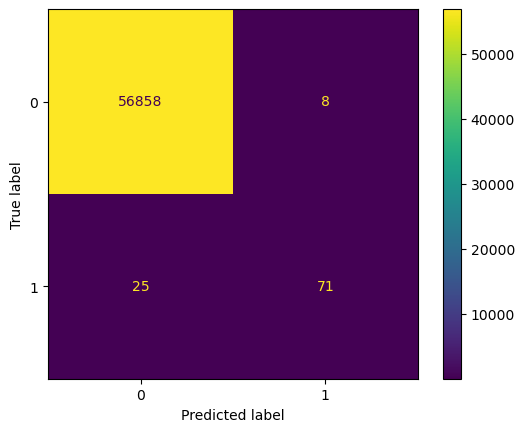

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy:  0.999420666409185
Specificity:  0.9998593183976365
sensitivity:  0.7395833333333334
f1-score:  0.8114285714285714


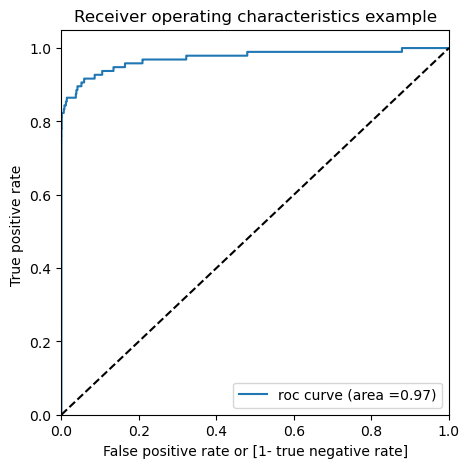

In [147]:
result("XGBoost: ", xgb_model)

SUMMARY OF RESULTS:

In [148]:
results.sort_values(by="ROC",ascending=False)

model name  accuracy  f1-score       ROC
0  Logistic Regression  0.998982  0.641975  0.977696
3            XGBoost:   0.999421  0.811429  0.972360
2      Random Forest:   0.998912  0.659341  0.957097
1      Decision Tree:   0.998771  0.615385  0.921750